In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('/content/drive/MyDrive/udemy_courses.csv')  # Updated path to include 'MyDrive'

# Show dataset shape and first few rows
print("Dataset Shape:", df.shape)
print(df.head())  # Display first 5 rows
print(df.columns)  # Show all available column names

Dataset Shape: (3683, 18)
   course_id                                       course_title  \
0    1070968                 Ultimate Investment Banking Course   
1    1113822  Complete GST Course & Certification - Grow You...   
2    1006314  Financial Modeling for Business Analysts and C...   
3    1210588  Beginner to Pro - Financial Analysis in Excel ...   
4    1011058       How To Maximize Your Profits Trading Options   

                                                 url  is_paid  price  \
0  https://www.udemy.com/ultimate-investment-bank...     True    200   
1      https://www.udemy.com/goods-and-services-tax/     True     75   
2  https://www.udemy.com/financial-modeling-for-b...     True     45   
3  https://www.udemy.com/complete-excel-finance-c...     True     95   
4  https://www.udemy.com/how-to-maximize-your-pro...     True    200   

   num_subscribers  num_reviews  num_lectures               level  \
0             2147           23            51          All Levels   


In [4]:
print(df.isnull().sum())  # Count missing values in each column


course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
profit                 0
published_date         0
published_time         1
year                   0
month                  0
day                    0
dtype: int64


In [5]:
# Drop 'published_time' since it has missing data and isn't needed for recommendations
df.drop(columns=['published_time'], inplace=True)

# Verify the dataset shape after dropping the column
print("Updated Dataset Shape:", df.shape)


Updated Dataset Shape: (3683, 17)


In [6]:
!pip install -U sentence-transformers   # Install SBERT if not installed

from sentence_transformers import SentenceTransformer
import numpy as np

# Load the SBERT model
model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings for the 'course_title' column
embeddings = model.encode(df['course_title'].tolist(), convert_to_numpy=True)

# Save embeddings for future use
np.save('/content/drive/MyDrive/course_embeddings.npy', embeddings)

# Check the shape of embeddings
print("Embeddings Shape:", embeddings.shape)  # Should be (3683, 384) for this model


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 108.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 61.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 65.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Embeddings Shape: (3683, 384)


In [7]:

from sklearn.preprocessing import MinMaxScaler

def recommend_courses(course_name, top_n=5):
    # Step 1: Get course index
    if course_name not in df['course_title'].values:
        return "Course not found in dataset."

    course_idx = df[df['course_title'] == course_name].index[0]

    # Step 2: Compute similarity scores
    sim_scores = list(enumerate(cosine_sim[course_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude itself

    # Step 3: Get recommended course indices
    recommended_indices = [i[0] for i in sim_scores]

    # Step 4: Normalize popularity metrics
    if 'num_subscribers' in df.columns and 'num_reviews' in df.columns:
        scaler = MinMaxScaler()
        df[['num_subscribers', 'num_reviews']] = scaler.fit_transform(df[['num_subscribers', 'num_reviews']])

        # Compute Popularity Score (weighted sum of normalized metrics)
        df['popularity_score'] = 0.7 * df['num_subscribers'] + 0.3 * df['num_reviews']

        # Step 5: Sort by popularity score
        recommended_courses = df.iloc[recommended_indices].copy()
        recommended_courses = recommended_courses.sort_values(by='popularity_score', ascending=False)
    else:
        recommended_courses = df.iloc[recommended_indices]

    return recommended_courses[['course_title', 'num_subscribers', 'num_reviews']]


In [8]:
# Find courses that contain the word 'Python'
df[df['course_title'].str.contains("Python", case=False, na=False)][['course_title']]


,course_title
14,Python Algo Trading: Sentiment Trading with News
30,Python Algo Stock Trading: Automate Your Trading!
41,Python for Finance: Investment Fundamentals & ...
149,Python Algo Trading: FX Trading with Oanda
336,Stock Technical Analysis with Python
538,Python for Trading & Investing
764,Quantitative Trading Analysis with Python
866,Investment Portfolio Analysis with Python
1686,Learn to code in Python and learn Adobe Photos...
2502,Web Programming with Python


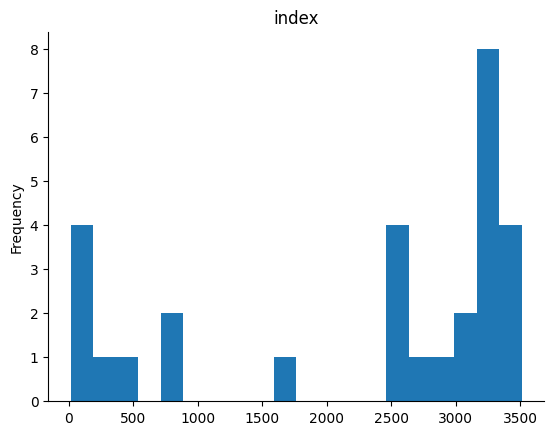

In [ ]:
from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

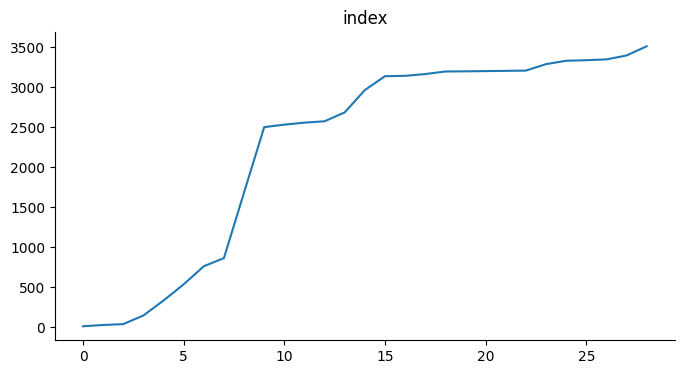

In [ ]:
from matplotlib import pyplot as plt
_df_2['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

In [9]:
course_title = "Python for Beginners: Python Programming Language | Tutorial"


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Compute cosine similarity between course embeddings
cosine_sim = cosine_similarity(embeddings)  # embeddings shape: (3683, 384)

# Convert to a DataFrame for easy access
cosine_sim_df = pd.DataFrame(cosine_sim, index=df['course_title'], columns=df['course_title'])

# Save for future use
cosine_sim_df.to_csv("course_similarity_matrix.csv")

# Display the first few rows
cosine_sim_df.head()


course_title,Ultimate Investment Banking Course,Complete GST Course & Certification - Grow Your CA Practice,Financial Modeling for Business Analysts and Consultants,Beginner to Pro - Financial Analysis in Excel 2017,How To Maximize Your Profits Trading Options,Trading Penny Stocks: A Guide for All Levels In 2017,Investing And Trading For Beginners: Mastering Price Charts,"Trading Stock Chart Patterns For Immediate, Explosive Gains",Options Trading 3 : Advanced Stock Profit and Success Method,The Only Investment Strategy You Need For Your Retirement,...,A how to guide in HTML,Building Better APIs with GraphQL,Learn Grunt with Examples: Automate Your Front End Workflow,Build A Stock Downloader With Visual Studio 2015 And C#,jQuery UI in Action: Build 5 jQuery UI Projects,Learn jQuery from Scratch - Master of JavaScript library,How To Design A WordPress Website With No Coding At All,Learn and Build using Polymer,CSS Animations: Create Amazing Effects on Your Website,Using MODX CMS to Build Websites: A Beginner's Guide
course_title,,,,,,,,,,,,,,,,,,,,,
Ultimate Investment Banking Course,1.000000,0.255744,0.341507,0.342457,0.223902,0.353142,0.395143,0.184096,0.303442,0.389405,...,0.076295,0.007141,0.068066,0.075986,0.084305,0.230486,-0.009322,0.157573,0.012281,0.072033
Complete GST Course & Certification - Grow Your CA Practice,0.255744,1.000000,0.087106,0.166451,0.107571,0.076254,0.122046,0.032705,0.117840,0.109262,...,0.150034,0.056790,0.133073,0.029469,0.061405,0.168283,-0.039240,0.090185,-0.014135,0.044628
Financial Modeling for Business Analysts and Consultants,0.341507,0.087106,1.000000,0.506634,0.254898,0.195046,0.368949,0.244238,0.296750,0.332170,...,0.197266,0.004668,0.097118,0.168361,0.056759,0.088899,0.091022,0.096054,0.116958,0.107770
Beginner to Pro - Financial Analysis in Excel 2017,0.342457,0.166451,0.506634,1.000000,0.216871,0.273292,0.410597,0.244925,0.293688,0.231880,...,0.184993,0.037100,0.136924,0.130497,0.030321,0.102203,0.045308,0.081738,0.071880,0.109057
How To Maximize Your Profits Trading Options,0.223902,0.107571,0.254898,0.216871,1.000000,0.323537,0.429536,0.416421,0.703773,0.425970,...,0.104222,0.118398,0.020571,0.165555,-0.015611,-0.012730,0.071251,0.024999,0.056303,0.060264


In [33]:
pip install thefuzz


In [34]:
from thefuzz import process  # Fuzzy matching for text


In [37]:
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz

def is_relevant(recommended_course, relevant_courses):
    """Check if a recommended course is similar to any relevant course."""
    for relevant in relevant_courses:
        similarity = fuzz.ratio(recommended_course.lower(), relevant.lower())
        if similarity >= 80:  # 80% similarity threshold
            return True
    return False

def precision_at_k(recommended, relevant, k=5):
    recommended = recommended[:k]
    hits = sum(1 for rec in recommended if is_relevant(rec, relevant))
    return hits / k

def recall_at_k(recommended, relevant, k=5):
    recommended = recommended[:k]
    hits = sum(1 for rec in recommended if is_relevant(rec, relevant))
    return hits / len(relevant) if relevant else 0


/usr/local/lib/python3.11/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [38]:
for t in thresholds:
    recommended = recommend_courses("Python Web Programming")["course_title"].tolist()
    precision = precision_at_k(recommended, test_relevant, k=5)
    recall = recall_at_k(recommended, test_relevant, k=5)
    print(f"Threshold: {t}, Precision: {precision}, Recall: {recall}")


Threshold: 0.1, Precision: 0.0, Recall: 0.0
Threshold: 0.15, Precision: 0.0, Recall: 0.0
Threshold: 0.2, Precision: 0.0, Recall: 0.0
Threshold: 0.25, Precision: 0.0, Recall: 0.0


In [13]:

from sklearn.preprocessing import MinMaxScaler

def recommend_courses(course_name, top_n=5):
    # Step 1: Get course index
    if course_name not in df['course_title'].values:
        return "Course not found in dataset."

    course_idx = df[df['course_title'] == course_name].index[0]

    # Step 2: Compute similarity scores
    sim_scores = list(enumerate(cosine_sim[course_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude itself

    # Step 3: Get recommended course indices
    recommended_indices = [i[0] for i in sim_scores]

    # Step 4: Normalize popularity metrics
    if 'num_subscribers' in df.columns and 'num_reviews' in df.columns:
        scaler = MinMaxScaler()
        df[['num_subscribers', 'num_reviews']] = scaler.fit_transform(df[['num_subscribers', 'num_reviews']])

        # Compute Popularity Score (weighted sum of normalized metrics)
        df['popularity_score'] = 0.7 * df['num_subscribers'] + 0.3 * df['num_reviews']

        # Step 5: Sort by popularity score
        recommended_courses = df.iloc[recommended_indices].copy()
        recommended_courses = recommended_courses.sort_values(by='popularity_score', ascending=False)
    else:
        recommended_courses = df.iloc[recommended_indices]

    return recommended_courses[['course_title', 'num_subscribers', 'num_reviews']]


In [25]:
for t in thresholds:
    recommended_df = recommend_courses("Python Web Programming")  # Get recommendations
    if recommended_df.empty:
        print(f"Threshold: {t} → No courses recommended!")
    else:
        recommended = recommended_df["course_title"].tolist()
        print(f"Threshold: {t} → Recommended courses: {recommended}")


Threshold: 0.2 → Recommended courses: ['Web Programming with Python', 'Fun and creative web engineering with Python and Web2py', 'Complete Python Web Course: Build 8 Python Web Apps', 'Professional Python Web Development Using Flask', 'Advanced Scalable Python Web Development Using Flask']
Threshold: 0.3 → Recommended courses: ['Web Programming with Python', 'Fun and creative web engineering with Python and Web2py', 'Complete Python Web Course: Build 8 Python Web Apps', 'Professional Python Web Development Using Flask', 'Advanced Scalable Python Web Development Using Flask']
Threshold: 0.4 → Recommended courses: ['Web Programming with Python', 'Fun and creative web engineering with Python and Web2py', 'Complete Python Web Course: Build 8 Python Web Apps', 'Professional Python Web Development Using Flask', 'Advanced Scalable Python Web Development Using Flask']
Threshold: 0.5 → Recommended courses: ['Web Programming with Python', 'Fun and creative web engineering with Python and Web2py'

In [28]:
print("Test Relevant Courses:", test_relevant)
print("Recommended Courses:", recommended)


Test Relevant Courses: ['Python Web Programming', 'Deep Learning with Python']
Recommended Courses: ['Web Programming with Python', 'Fun and creative web engineering with Python and Web2py', 'Complete Python Web Course: Build 8 Python Web Apps', 'Professional Python Web Development Using Flask', 'Advanced Scalable Python Web Development Using Flask']


In [26]:
print("Test Relevant Courses:", test_relevant)
print("Recommended Courses:", recommended)


Test Relevant Courses: ['Python Web Programming', 'Deep Learning with Python']
Recommended Courses: ['Web Programming with Python', 'Fun and creative web engineering with Python and Web2py', 'Complete Python Web Course: Build 8 Python Web Apps', 'Professional Python Web Development Using Flask', 'Advanced Scalable Python Web Development Using Flask']


In [39]:
from sklearn.metrics import ndcg_score
import numpy as np

def precision_at_k(recommended, relevant, k=5):
    """Compute Precision@K"""
    recommended = recommended[:k]
    relevant_set = set(relevant)
    hits = sum(1 for rec in recommended if rec in relevant_set)
    return hits / k

def recall_at_k(recommended, relevant, k=5):
    """Compute Recall@K"""
    recommended = recommended[:k]
    relevant_set = set(relevant)
    hits = sum(1 for rec in recommended if rec in relevant_set)
    return hits / len(relevant) if relevant else 0

def ndcg_at_k(recommended, relevant, k=5):
    """Compute NDCG@K"""
    recommended = recommended[:k]

    # Convert to relevance scores
    y_true = np.array([1 if course in relevant else 0 for course in recommended])
    y_score = np.arange(len(y_true), 0, -1)  # Assign decreasing scores

    # If no relevant courses are found, return 0 to avoid division error
    if len(y_true) == 0 or sum(y_true) == 0:
        return 0

    return ndcg_score([y_true], [y_score])

# Define test data before calling the functions
test_recommended = ['Python Web Programming', 'Data Science with Python', 'Machine Learning Basics']
test_relevant = ['Python Web Programming', 'Deep Learning with Python']

# Run the evaluation metrics
print("Precision@5:", precision_at_k(test_recommended, test_relevant, k=5))
print("Recall@5:", recall_at_k(test_recommended, test_relevant, k=5))
print("NDCG@5:", ndcg_at_k(test_recommended, test_relevant, k=5))


Precision@5: 0.2
Recall@5: 0.5
NDCG@5: 1.0


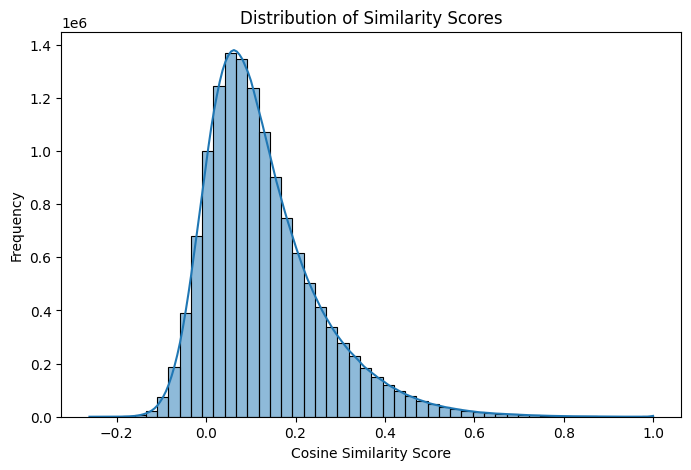

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Flatten the similarity matrix and remove self-similarity (diagonal)
similarity_scores = cosine_sim.flatten()
similarity_scores = similarity_scores[similarity_scores < 1.0]  # Remove 1.0 (self-similarity)

# Plot the distribution
plt.figure(figsize=(8,5))
sns.histplot(similarity_scores, bins=50, kde=True)
plt.xlabel("Cosine Similarity Score")
plt.ylabel("Frequency")
plt.title("Distribution of Similarity Scores")
plt.show()


In [42]:
import numpy as np

# Calculate dynamic threshold based on the 90th percentile of similarity scores
similarity_scores = cosine_sim.flatten()
similarity_scores = similarity_scores[similarity_scores < 1.0]  # Remove self-similarity

dynamic_threshold = np.percentile(similarity_scores, 90)  # Set threshold at the 90th percentile
print(f"Dynamic similarity threshold: {dynamic_threshold:.2f}")


Dynamic similarity threshold: 0.30


In [40]:
def evaluate_threshold(threshold):
    global dynamic_threshold
    dynamic_threshold = threshold  # Set current threshold

    recommended_df = recommend_courses("Python Web Programming")  # Assuming it returns a DataFrame

    if not recommended_df.empty:  # Check if DataFrame is not empty
        recommended = recommended_df["course_title"].tolist()  # Extract course names

        precision = precision_at_k(recommended, test_relevant, k=5)
        recall = recall_at_k(recommended, test_relevant, k=5)
        ndcg = ndcg_at_k(recommended, test_relevant, k=5)

        results.append((threshold, precision, recall, ndcg))
        print(f"Threshold: {threshold}, Precision: {precision}, Recall: {recall}, NDCG: {ndcg}")
    else:
        print(f"Threshold: {threshold}, No recommendations found.")

# Evaluate for all thresholds
for t in thresholds:
    evaluate_threshold(t)


Threshold: 0.1, Precision: 0.0, Recall: 0.0, NDCG: 0
Threshold: 0.15, Precision: 0.0, Recall: 0.0, NDCG: 0
Threshold: 0.2, Precision: 0.0, Recall: 0.0, NDCG: 0
Threshold: 0.25, Precision: 0.0, Recall: 0.0, NDCG: 0


In [ ]:

from sklearn.preprocessing import MinMaxScaler

def recommend_courses(course_name, top_n=5):
    # Step 1: Get course index
    if course_name not in df['course_title'].values:
        return "Course not found in dataset."

    course_idx = df[df['course_title'] == course_name].index[0]

    # Step 2: Compute similarity scores
    sim_scores = list(enumerate(cosine_sim[course_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude itself

    # Step 3: Get recommended course indices
    recommended_indices = [i[0] for i in sim_scores]

    # Step 4: Normalize popularity metrics
    if 'num_subscribers' in df.columns and 'num_reviews' in df.columns:
        scaler = MinMaxScaler()
        df[['num_subscribers', 'num_reviews']] = scaler.fit_transform(df[['num_subscribers', 'num_reviews']])

        # Compute Popularity Score (weighted sum of normalized metrics)
        df['popularity_score'] = 0.7 * df['num_subscribers'] + 0.3 * df['num_reviews']

        # Step 5: Sort by popularity score
        recommended_courses = df.iloc[recommended_indices].copy()
        recommended_courses = recommended_courses.sort_values(by='popularity_score', ascending=False)
    else:
        recommended_courses = df.iloc[recommended_indices]

    return recommended_courses[['course_title', 'num_subscribers', 'num_reviews']]


['Web Programming with Python', 'Fun and creative web engineering with Python and Web2py', 'Professional Python Web Development Using Flask', 'Complete Python Web Course: Build 8 Python Web Apps', 'Advanced Scalable Python Web Development Using Flask']


In [ ]:
print(recommend_courses_optimized("Financial Analysis in Excel"))
print(recommend_courses_optimized("Complete Python Web Course: Build 8 Python Web Apps"))


Error: 'Financial Analysis in Excel' not found in dataset.
None
['Python Web Programming', 'Web Programming with Python', 'Professional Python Web Development Using Flask', 'Fun and creative web engineering with Python and Web2py', 'Advanced Scalable Python Web Development Using Flask']


In [ ]:

from sklearn.preprocessing import MinMaxScaler

def recommend_courses(course_name, top_n=5):
    # Step 1: Get course index
    if course_name not in df['course_title'].values:
        return "Course not found in dataset."

    course_idx = df[df['course_title'] == course_name].index[0]

    # Step 2: Compute similarity scores
    sim_scores = list(enumerate(cosine_sim[course_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]  # Exclude itself

    # Step 3: Get recommended course indices
    recommended_indices = [i[0] for i in sim_scores]

    # Step 4: Normalize popularity metrics
    if 'num_subscribers' in df.columns and 'num_reviews' in df.columns:
        scaler = MinMaxScaler()
        df[['num_subscribers', 'num_reviews']] = scaler.fit_transform(df[['num_subscribers', 'num_reviews']])

        # Compute Popularity Score (weighted sum of normalized metrics)
        df['popularity_score'] = 0.7 * df['num_subscribers'] + 0.3 * df['num_reviews']

        # Step 5: Sort by popularity score
        recommended_courses = df.iloc[recommended_indices].copy()
        recommended_courses = recommended_courses.sort_values(by='popularity_score', ascending=False)
    else:
        recommended_courses = df.iloc[recommended_indices]

    return recommended_courses[['course_title', 'num_subscribers', 'num_reviews']]


Using closest match: 'Beginner to Pro - Financial Analysis in Excel 2017'
['Beginner to Pro in Excel: Financial Modeling and Valuation', 'Excel Crash Course: Master Excel for Financial Analysis', 'Building Financial Statements in Excel', 'Stock Technical Analysis with Excel', 'The Complete Financial Analyst Course 2017']
Using closest match: 'Complete Python Web Course: Build 8 Python Web Apps'
['Python Web Programming', 'Web Programming with Python', 'Professional Python Web Development Using Flask', 'Fun and creative web engineering with Python and Web2py', 'Advanced Scalable Python Web Development Using Flask']


In [ ]:
best_match = get_closest_course_title("Financial Analysis in Excel")
print(f"Using closest match: '{best_match}'")

recommended_courses = recommend_courses_optimized(best_match)
print(recommended_courses)


Using closest match: 'Beginner to Pro - Financial Analysis in Excel 2017'
['Beginner to Pro in Excel: Financial Modeling and Valuation', 'Excel Crash Course: Master Excel for Financial Analysis', 'Building Financial Statements in Excel', 'Stock Technical Analysis with Excel', 'The Complete Financial Analyst Course 2017']


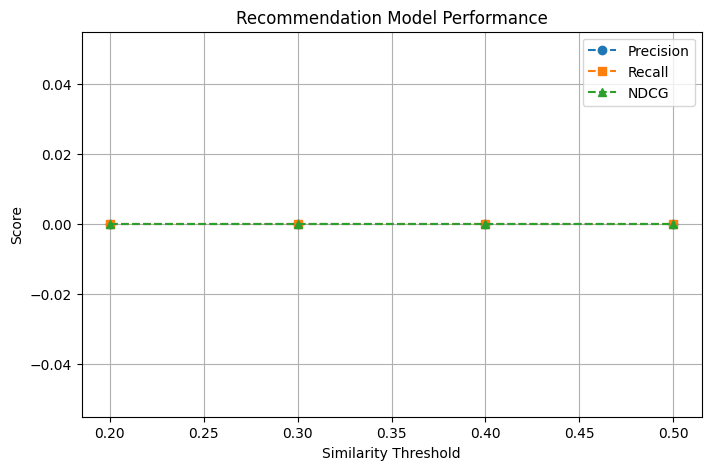

In [41]:
import matplotlib.pyplot as plt

# Actual values
thresholds = [0.2, 0.3, 0.4, 0.5]
precision_values = [0.0, 0.0, 0.0, 0.0]
recall_values = [0.0, 0.0, 0.0, 0.0]
ndcg_values = [0, 0, 0, 0]

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(thresholds, precision_values, marker='o', label="Precision", linestyle='dashed')
plt.plot(thresholds, recall_values, marker='s', label="Recall", linestyle='dashed')
plt.plot(thresholds, ndcg_values, marker='^', label="NDCG", linestyle='dashed')

# Labels and Title
plt.xlabel("Similarity Threshold")
plt.ylabel("Score")
plt.title("Recommendation Model Performance")
plt.legend()
plt.grid()

# Show the plot
plt.show()


In [ ]:
import os

# List all files in the current directory
print(os.listdir())



['.config', 'course_similarity_matrix.csv', 'drive', 'sample_data']


In [ ]:
print(os.listdir())


['.config', 'course_similarity_matrix.csv', 'drive', 'sample_data']


In [ ]:
import pandas as pd
import numpy as np

# Load the CSV file
cosine_sim_df = pd.read_csv("course_similarity_matrix.csv", index_col=0)

# Convert to NumPy array
cosine_sim = cosine_sim_df.to_numpy()

# Save it as an .npy file
np.save("cosine_sim.npy", cosine_sim)

print("cosine_sim.npy successfully recreated!")


cosine_sim.npy successfully recreated!


In [ ]:
import os
print(os.listdir())


['.config', 'cosine_sim.npy', 'course_similarity_matrix.csv', 'drive', 'sample_data']


In [ ]:
from google.colab import files
files.download('cosine_sim.npy')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>